In [165]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from itertools import combinations

In [166]:
color_palette = sns.color_palette('husl', 10)

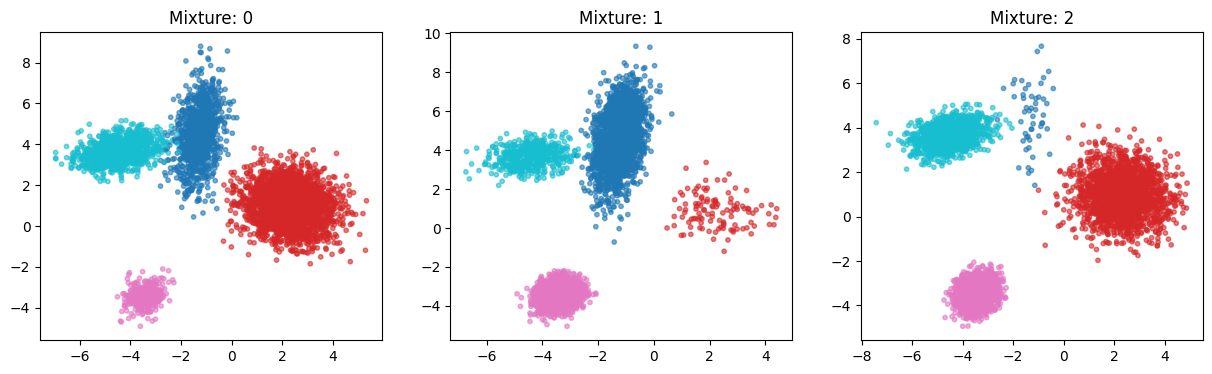

In [167]:
np.random.seed(42)

# Parameters for the Gaussian Mixture Model
n_components = 4  # Number of Gaussian components
n_points = 5000    # Total number of points to sample

num_tasks = 3

# Randomly generate means for the components (centered in a 2D space)
means = np.random.uniform(-5, 5, size=(n_components, 2))

# Generate random covariance matrices for each component
covariances = []
for _ in range(n_components):
    # A = np.random.rand(2, 2)  # Random 2x2 matrix
    A = np.random.uniform(-1, 1, size=(2, 2))
    cov = np.dot(A, A.T)  # Symmetric positive semi-definite matrix
    covariances.append(cov)

# Define the mixture weights (random, normalized to sum to 1)
weights = [np.random.dirichlet(np.ones(n_components)) for _ in range(num_tasks)]

# Plot the samples
fig, ax = plt.subplots(1, num_tasks, figsize=(15, 4))

for num_task in range(num_tasks):
    # Sample component indices based on the mixture weights
    component_indices = np.random.choice(n_components, size=n_points, p=weights[num_task])
    # Initialize an array to hold the samples
    samples = np.zeros((n_points, 2))
    # Generate samples for each component
    for i in range(n_components):
        indices = np.where(component_indices == i)[0]
        samples[indices] = np.random.multivariate_normal(
            mean=means[i], cov=covariances[i], size=len(indices)
        )
    ax[num_task].scatter(samples[:, 0], samples[:, 1], alpha=0.6, s=10, c=component_indices, cmap="tab10")
    ax[num_task].set_title(f'Mixture: {num_task}')
    
# plt.title("Samples from Gaussian Mixture Model with 10 Components")
# plt.xlabel("X-axis")
# plt.ylabel("Y-axis")
# plt.axis('equal')
# plt.colorbar(label="Component Index")
# plt.show()

# Easy task distributions that consists of averages

/var/folders/b3/3vgsg15j72gc54f0qpjcfkym0000gn/T/ipykernel_13251/3795220989.py:37: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ellipse = Ellipse(mean, width, height, angle, edgecolor=color, facecolor=color, alpha=alpha)


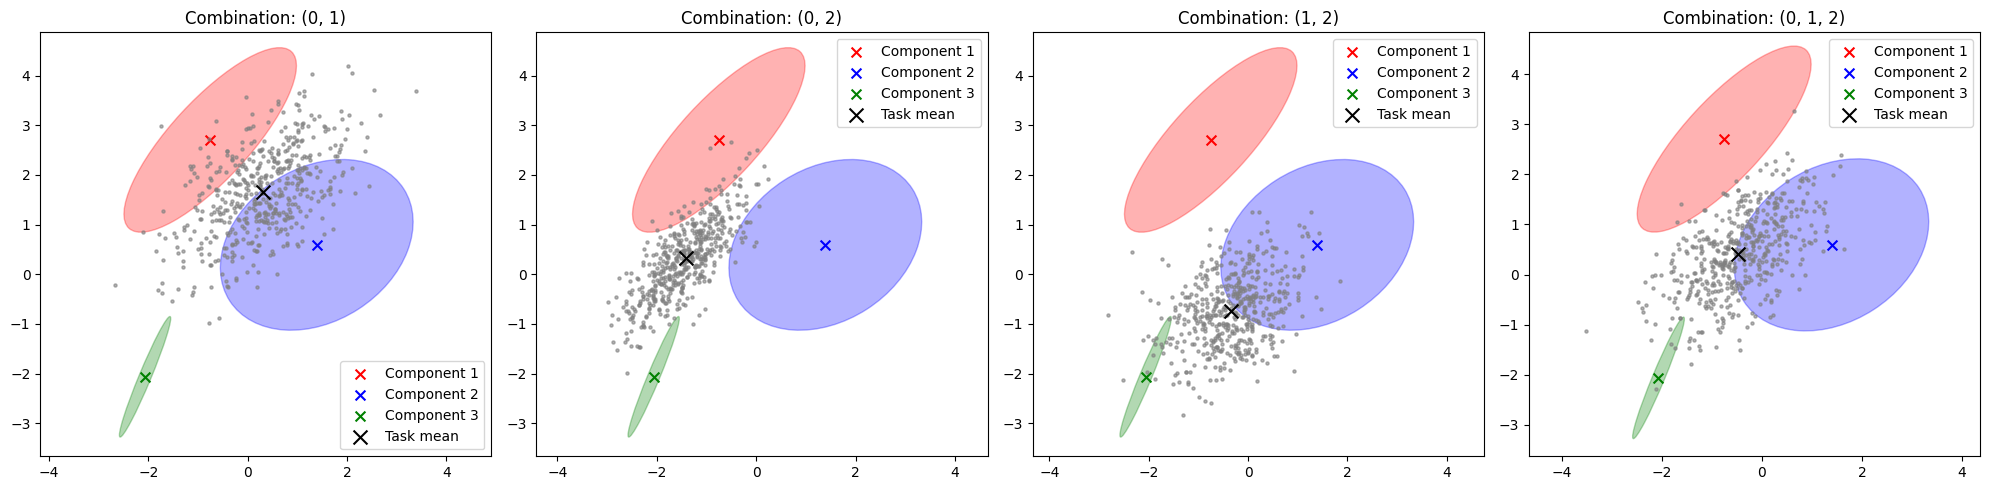

In [180]:
# Initialize the parameters for the 3 Gaussian components
n_components = 3
n_points_per_mixture = 500

# Set random seed for reproducibility
np.random.seed(42)

# Generate random means for the 3 components
means = np.random.uniform(-3, 3, size=(n_components, 2))

# Generate random covariance matrices
covariances = []
for _ in range(n_components):
    A = np.random.rand(2, 2)
    cov = np.dot(A, A.T)  # Symmetric positive semi-definite covariance
    covariances.append(cov)

# Helper function to compute average mean and covariance for a subset
def compute_average_params(subset_indices):
    subset_means = [means[i] for i in subset_indices]
    subset_covariances = [covariances[i] for i in subset_indices]
    
    # Average the means
    avg_mean = np.mean(subset_means, axis=0)
    
    # Average the covariances
    avg_cov = np.mean(subset_covariances, axis=0)
    
    return avg_mean, avg_cov

# Helper function to plot covariance ellipses
def plot_covariance_ellipse(ax, mean, cov, color, alpha=0.3, n_std=2):
    """Plot an ellipse to represent the covariance of a Gaussian."""
    eigenvalues, eigenvectors = np.linalg.eigh(cov)
    angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))
    width, height = 2 * n_std * np.sqrt(eigenvalues)
    ellipse = Ellipse(mean, width, height, angle, edgecolor=color, facecolor=color, alpha=alpha)
    ax.add_patch(ellipse)

# Generate subsets: all pairs (size 2) and one full set (size 3)
subset_sizes = [2, 3]
combinations_list = []

for size in subset_sizes:
    combinations_list += list(combinations(range(n_components), size))

# Store samples and titles for subplots
new_mixtures = []
new_means = []
titles = []

# Generate samples for each subset combination
for subset in combinations_list:
    # Compute average mean and covariance for this subset
    avg_mean, avg_cov = compute_average_params(subset)
    
    # Sample points from the new Gaussian distribution
    samples = np.random.multivariate_normal(avg_mean, avg_cov, n_points_per_mixture)
    new_means.append(avg_mean)
    new_mixtures.append(samples)
    titles.append(f"Combination: {subset}")

# Plot settings
n_subplots = len(new_mixtures)
fig, axes = plt.subplots(1, n_subplots, figsize=(5 * n_subplots, 5))
axes = np.atleast_1d(axes)

# Plot each new mixture in its own subplot
colors = ['red', 'blue', 'green']  # Colors for original components
for i, ax in enumerate(axes):
    # Plot the original components
    for j in range(n_components):
        ax.scatter(means[j][0], means[j][1], color=colors[j], s=50, marker='x', label=f'Component {j+1}')
        plot_covariance_ellipse(ax, means[j], covariances[j], color=colors[j])
    # Plot the new mixture samples
    ax.scatter(new_mixtures[i][:, 0], new_mixtures[i][:, 1], s=5, alpha=0.6, color='gray')
    ax.scatter(new_means[i][0], new_means[i][1], s=100, marker='x', color='black', label='Task mean')
    ax.set_title(titles[i])
    ax.axis('equal')
    ax.legend()
plt.tight_layout()
plt.show()

# More tasks example with different weightings instead of average

/var/folders/b3/3vgsg15j72gc54f0qpjcfkym0000gn/T/ipykernel_13251/4036621126.py:29: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ellipse = Ellipse(mean, width, height, angle, edgecolor=color, facecolor=color, alpha=alpha)


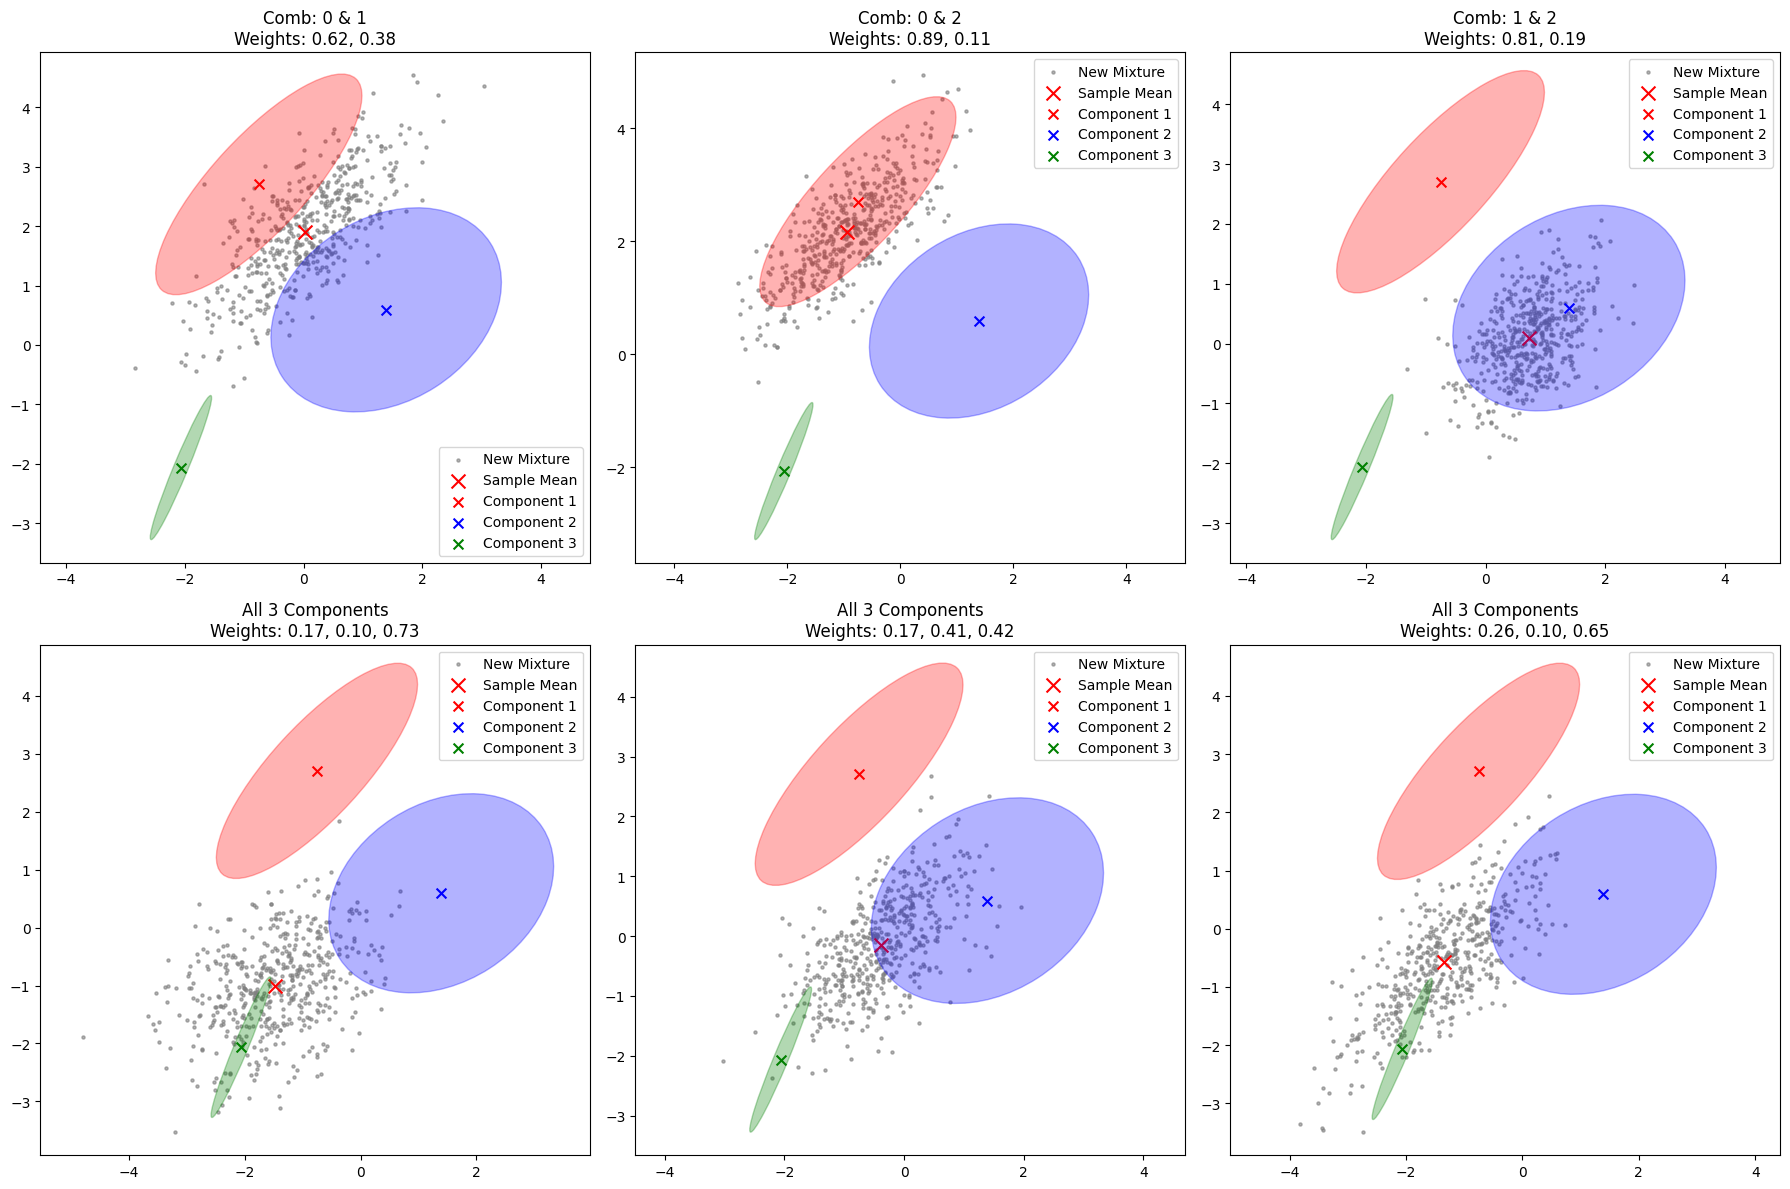

In [189]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from itertools import combinations

# Initialize the parameters for the 3 Gaussian components
n_components = 3
n_points_per_mixture = 500

# Set random seed for reproducibility
np.random.seed(42)

# Generate random means for the 3 components
means = np.random.uniform(-3, 3, size=(n_components, 2))

# Generate random covariance matrices
covariances = []
for _ in range(n_components):
    A = np.random.rand(2, 2)
    cov = np.dot(A, A.T)  # Symmetric positive semi-definite covariance
    covariances.append(cov)

# Helper function to plot covariance ellipses
def plot_covariance_ellipse(ax, mean, cov, color, alpha=0.3, n_std=2):
    """Plot an ellipse to represent the covariance of a Gaussian."""
    eigenvalues, eigenvectors = np.linalg.eigh(cov)
    angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))
    width, height = 2 * n_std * np.sqrt(eigenvalues)
    ellipse = Ellipse(mean, width, height, angle, edgecolor=color, facecolor=color, alpha=alpha)
    ax.add_patch(ellipse)

# Helper function to compute random convex combination of multiple components
def random_convex_combination(values):
    weights = np.random.dirichlet(np.ones(len(values)))  # Random weights summing to 1
    combined_value = sum(w * v for w, v in zip(weights, values))
    return combined_value, weights

# Prepare the figure with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Colors for original components
colors = ['red', 'blue', 'green']

# --- Upper Row: Combinations of 2 Components ---
pair_combinations = list(combinations(range(n_components), 2))
for i, (c1, c2) in enumerate(pair_combinations):
    # Random convex combination of means and covariances for the two components
    combined_mean, mean_weights = random_convex_combination([means[c1], means[c2]])
    combined_cov, cov_weights = random_convex_combination([covariances[c1], covariances[c2]])
    
    # Sample points
    samples = np.random.multivariate_normal(combined_mean, combined_cov, n_points_per_mixture)
    sample_mean = samples.mean(axis=0)  # Mean of sampled points
    
    # Plot the result
    ax = axes[i]
    ax.scatter(samples[:, 0], samples[:, 1], s=5, alpha=0.6, color='gray', label="New Mixture")
    ax.scatter(sample_mean[0], sample_mean[1], color='red', marker='x', s=100, label="Sample Mean")
    ax.set_title(f"Comb: {c1} & {c2}\nWeights: {mean_weights[0]:.2f}, {mean_weights[1]:.2f}")
    
    # Plot original components
    for j in range(n_components):
        ax.scatter(means[j][0], means[j][1], color=colors[j], s=50, marker='x', label=f'Component {j+1}')
        plot_covariance_ellipse(ax, means[j], covariances[j], color=colors[j])
    ax.axis('equal')
    ax.legend()

# --- Lower Row: 3 Random Convex Combinations for All 3 Components ---
for i in range(3):
    # Random convex combination of all three components
    combined_mean, mean_weights = random_convex_combination([means[0], means[1], means[2]])
    combined_cov, cov_weights = random_convex_combination([covariances[0], covariances[1], covariances[2]])
    
    # Sample points
    samples = np.random.multivariate_normal(combined_mean, combined_cov, n_points_per_mixture)
    sample_mean = samples.mean(axis=0)  # Mean of sampled points
    
    # Plot the result
    ax = axes[i + 3]
    ax.scatter(samples[:, 0], samples[:, 1], s=5, alpha=0.6, color='gray', label="New Mixture")
    ax.scatter(sample_mean[0], sample_mean[1], color='red', marker='x', s=100, label="Sample Mean")
    ax.set_title(f"All 3 Components\nWeights: {mean_weights[0]:.2f}, {mean_weights[1]:.2f}, {mean_weights[2]:.2f}")
    
    # Plot original components
    for j in range(n_components):
        ax.scatter(means[j][0], means[j][1], color=colors[j], s=50, marker='x', label=f'Component {j+1}')
        plot_covariance_ellipse(ax, means[j], covariances[j], color=colors[j])
    ax.axis('equal')
    ax.legend()

plt.tight_layout()
plt.show()
